In [28]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from surprise import Reader, Dataset, SVD, SVDpp, SlopeOne, NMF, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering, accuracy
from surprise.model_selection import cross_validate, train_test_split

In [2]:
metaPath = 'Data/meta_Magazine_Subscriptions.json'
reviewPath = 'Data/Magazine_Subscriptions.json'

metaData = []
reviewData = []

for line in open(metaPath, 'r'):
    metaData.append(json.loads(line))
    
for line in open(reviewPath, 'r'):
    reviewData.append(json.loads(line))

In [3]:
# convert metadata into pandas dataframe

metaDF = pd.DataFrame.from_dict(metaData)
metaDF.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Magazine Subscriptions, Professional & Educat...",,[REASON is edited for people interested in eco...,,"<span class=""a-size-medium a-color-secondary""","[B002PXVYLE, B01MCU84LB, B000UHI2LW, B01AKS14A...",,Reason Magazine,[],[],"[B002PXVYLE, B000UHI2LW, B01MCU84LB, B002PXW18...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B00005N7NQ,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,"[Magazine Subscriptions, Arts, Music &amp; Pho...",,[Written by and for musicians. Covers a variet...,,"<span class=""a-size-medium a-color-secondary""","[B002PXVYGE, B0054LRNC8, B000BVEELE, B00006KC3...",,String Letter Publishers,[],742 in Magazine Subscriptions (,"[B002PXVYGE, B0054LRNC8, B00006L16A, 171906487...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B00005N7OC,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Magazine Subscriptions, Fashion &amp; Style, ...",,[Allure is the beauty expert. Every issue is f...,,"<span class=""a-size-medium a-color-secondary""","[B001THPA4O, B002PXVZWW, B001THPA1M, B001THPA1...",,Conde Nast Publications,[],[],"[B002PXVZWW, B001THPA4O, B001THPA1M, B01N819UD...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B00005N7OD,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,"[Magazine Subscriptions, Sports, Recreation & ...",,[FLIGHT JOURNAL includes articles on aviation ...,,"<span class=""a-size-medium a-color-secondary""","[B07JVF7QW4, B00ATQ6FPY, B002G551F6, B00008CGW...",,AirAge Publishing,[],[],"[B002G551F6, B00ATQ6FPY, B00005N7PT, B001THPA2...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B00005N7O9,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,"[Magazine Subscriptions, Professional & Educat...",,[RIDER is published for the road and street ri...,,"<span class=""a-size-medium a-color-secondary""","[B002PXVYD2, B01BM7TOU6, B000060MKJ, B000BNNIG...",,EPG Media & Specialty Information,[],[],"[B01BM7TOU6, B000060MKJ, B002PXVYD2, B000BNNIG...","{'Format:': 'Print Magazine', 'Shipping: ': 'C...",Magazine Subscriptions,,,,B00005N7O6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [4]:
# convert reviews data into pandas dataframe

reviewDF = pd.DataFrame.from_dict(reviewData)
reviewDF.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5.0,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5.0,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3.0,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5.0,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5.0,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN


In [5]:
# Drop duplicates

#convert dataframe values to string in order to use drop_duplicates method
metaDF = metaDF.astype(str)
reviewDF = reviewDF.astype(str)

metaDF = metaDF.drop_duplicates()
reviewDF = reviewDF.drop_duplicates()


In [6]:
#check how many products, reviews and reviewers there are
print('There are {} unique products and {} unique reviews made by {} unique reviewers'.format(
    len(metaDF), len(reviewDF), len(reviewDF['reviewerID'].unique())
))

There are 2320 unique products and 88496 unique reviews made by 72098 unique reviewers


In [7]:
# Collect reviewerID, productID and ratings into a single dataframe
ratings = reviewDF[['reviewerID', 'asin', 'overall']]
ratings.head()

,reviewerID,asin,overall
0,AH2IFH762VY5U,B00005N7P0,5.0
1,AOSFI0JEYU4XM,B00005N7P0,5.0
2,A3JPFWKS83R49V,B00005N7OJ,3.0
3,A19FKU6JZQ2ECJ,B00005N7OJ,5.0
4,A25MDGOMZ2GALN,B00005N7P0,5.0


In [8]:
ratings = ratings.rename(columns={'asin': 'productID', 'overall': 'rating'})
ratings.head()

,reviewerID,productID,rating
0,AH2IFH762VY5U,B00005N7P0,5.0
1,AOSFI0JEYU4XM,B00005N7P0,5.0
2,A3JPFWKS83R49V,B00005N7OJ,3.0
3,A19FKU6JZQ2ECJ,B00005N7OJ,5.0
4,A25MDGOMZ2GALN,B00005N7P0,5.0


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88496 entries, 0 to 89688
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewerID  88496 non-null  object
 1   productID   88496 non-null  object
 2   rating      88496 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [10]:
# Convert to appropriate types
ratings = ratings.convert_dtypes()
ratings['rating'] = ratings[['rating']].astype('float').astype('int')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88496 entries, 0 to 89688
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewerID  88496 non-null  string
 1   productID   88496 non-null  string
 2   rating      88496 non-null  int64 
dtypes: int64(1), string(2)
memory usage: 2.7 MB


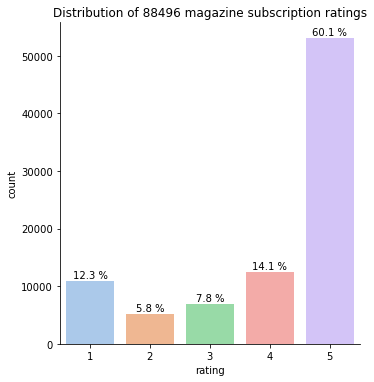

In [11]:
# Rating distribution
ax = sns.catplot(data = ratings, x = 'rating', kind = 'count', palette="pastel")
for i, p in enumerate(ax.ax.patches):
    height = p.get_height()
    ax.ax.text(p.get_x()+p.get_width()/2., height + 500, '{:.1f} %'.format((height / len(ratings) * 100)),ha="center")
plt.title('Distribution of 88496 magazine subscription ratings')
plt.show()

We can see that over 60% of all ratings in the data are 5.  Very few ratings are 2.

In [12]:
ratings_by_magazine = ratings.groupby('productID')['rating'].count().reset_index().sort_values(by = 'rating')
ratings_by_magazine

,productID,rating
284,B00006K175,1
972,B0000ARZRA,1
1973,B00UW1I7HA,1
1971,B00TST7RVE,1
975,B0000B0P0D,1
...,...,...
1409,B001LF4EVO,1339
769,B00007B10Y,1409
62,B00005N7SC,1480
24,B00005N7Q1,1537


In [13]:
ratings_by_magazine.value_counts('rating')

rating
1       413
2       246
3       176
4       146
5       127
       ... 
167       1
162       1
161       1
158       1
1718      1
Length: 239, dtype: int64

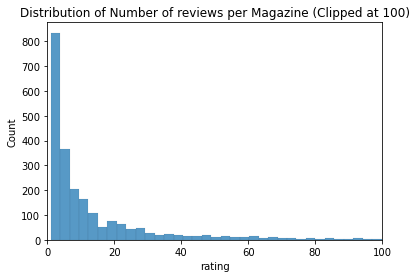

In [41]:
#Ratings by magazine
ax = sns.histplot(data = ratings_by_magazine, x = 'rating')
plt.title('Distribution of Number of reviews per Magazine (Clipped at 100)')
plt.xlim([0,100])
plt.show()

Most magazines received 1 review.  Very few magazines have many ratings, although the most rated magazine received 1718 reviews.

In [15]:
ratings_by_reviewer = ratings.groupby('reviewerID')['rating'].count().reset_index().sort_values(by = 'rating')
ratings_by_reviewer

,reviewerID,rating
0,A0068533X8Y5TYUJWWIC,1
46238,A3F4ON97S66SVI,1
46239,A3F4RALSU77SAW,1
46242,A3F4ZFSZ0Y0ZL7,1
46244,A3F520TD3N1C09,1
...,...,...
38444,A30H2335OM7RD6,22
46846,A3GA09FYFKL4EY,24
32315,A2OTUWUSH49XIN,24
60746,AEMZRE6QYVQBS,25


In [16]:
ratings_by_reviewer.value_counts('rating')

rating
1     61821
2      7433
3      1636
4       563
5       249
6       132
7        84
8        53
9        37
11       18
10       16
12       11
14        9
15        8
13        7
16        5
18        3
19        3
20        2
21        2
24        2
17        1
22        1
25        1
55        1
dtype: int64

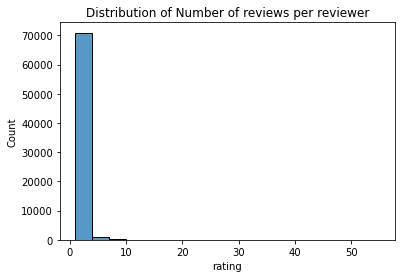

In [17]:
#Ratings by reviewer
ax = sns.histplot(data = ratings_by_reviewer, x = 'rating')
plt.title('Distribution of Number of reviews per reviewer')
plt.show()

Most reviewers give 1 review and not many reviewers gave many reviews.  The most productive reviewer gave 55 reviews.

In [18]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['reviewerID', 'productID', 'rating']], reader)

In [19]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), BaselineOnly(), CoClustering()]:
    #,KNNWithMeans(), KNNWithZScore()
    #, , , 
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
KNNBaseline,1.352703,119.012025,2.179666
SVD,1.353277,2.923195,0.175565
BaselineOnly,1.362085,0.137026,0.093209
SVDpp,1.368188,3.810979,0.221015
CoClustering,1.385576,3.229592,0.087930
SlopeOne,1.392953,0.438298,0.153346
KNNBasic,1.402361,110.073577,2.199250
NMF,1.407841,5.393536,0.112793
NormalPredictor,1.808402,0.053627,0.171402


In [22]:
benchmark = []
# Iterate over all algorithms
for algorithm in [KNNWithMeans(), KNNWithZScore()]:
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')  

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithMeans,1.388246,104.494508,2.133554
KNNWithZScore,1.391342,107.754299,2.244947


In [23]:
#KNNBaseline had the lowest rmse, I will train and predict with KNNBaseline and use ALS


print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = KNNBaseline(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


{'test_rmse': array([1.34653514, 1.34537087, 1.35225607]),
 'fit_time': (106.07044887542725, 115.45562982559204, 111.65344977378845),
 'test_time': (2.5778539180755615, 1.9722480773925781, 1.9618518352508545)}

In [29]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = KNNBaseline(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.3475


1.3474884519214634

In [30]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
#uid: userID
#iid: productID
#rui: true rating of user u for item i
#est: estimated rating of user u for item i
#details: 'actual_k' - number of neighbours
#Iu: set of all items rated by user u
#ui: set of all users that have rated item i
#err: error on the prediction
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [31]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
2341,A1RG5Y4BZTAXCI,B000IOELH6,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,266,0.0
12297,A2D3FKFSVZC8N1,B00T6S8400,5.0,5.0,"{'actual_k': 8, 'was_impossible': False}",6,17,0.0
18193,A3DHHQ2NGXOUAH,B000FTJ7BE,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",3,65,0.0
6770,ABS2A1OWX5Q8,B00008UQ0G,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",5,6,0.0
16541,A3QVNX8YUDH6AA,B00005N7T5,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",2,511,0.0
18109,AAZV7DET3J15U,B000ILY9LW,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",11,303,0.0
18104,A2EWTO7MMG82OD,B00D8FZIHE,5.0,5.0,"{'actual_k': 2, 'was_impossible': False}",11,44,0.0
14210,A3QNV9LUNM589P,B00005NIOO,5.0,5.0,"{'actual_k': 40, 'was_impossible': False}",6,331,0.0
7826,A17OLEREDUQP2F,B0160CN1YI,5.0,5.0,"{'actual_k': 13, 'was_impossible': False}",2,15,0.0
7820,A2QWX6JCU5X6SU,B001LF4EVO,5.0,5.0,"{'actual_k': 1, 'was_impossible': False}",1,1000,0.0


The above best predictions have 0 error and are not lucky guesses at all.  Almost all of their Ui's are above 15, with the highest being 1000.  This means that a significant number of users have previously rated the target magazine.

In [32]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
3568,AG3FYOB9BDRCV,B00XII1TTW,5.0,1.100448,"{'actual_k': 1, 'was_impossible': False}",1,28,3.899552
20540,A24HQWVDBJ5ZT5,B00007AY2T,1.0,4.912138,"{'actual_k': 1, 'was_impossible': False}",2,70,3.912138
12456,A2OK5NXR2J5AYM,B000N8V3FK,5.0,1.084141,"{'actual_k': 2, 'was_impossible': False}",1,139,3.915859
19752,A1QL9DVLKY14WL,B00006KL9U,1.0,4.917464,"{'actual_k': 1, 'was_impossible': False}",1,7,3.917464
14029,A2S8OUPBKU7QP3,B000063XJL,1.0,4.920902,"{'actual_k': 4, 'was_impossible': False}",1,561,3.920902
7688,A3NLVHGP3D7ADP,B00005N7P0,5.0,1.070934,"{'actual_k': 1, 'was_impossible': False}",1,161,3.929066
16161,A1YPEGJJ2LC8O3,B000IOE9Y6,1.0,4.964539,"{'actual_k': 2, 'was_impossible': False}",1,602,3.964539
14440,A2W568D54IMYAY,B00005N7PT,1.0,4.986811,"{'actual_k': 4, 'was_impossible': False}",1,240,3.986811
20261,AUE3DZCA30JP1,B00EVV77A0,5.0,1.000000,"{'actual_k': 1, 'was_impossible': False}",1,253,4.000000
3157,A17PGM166WWRS3,B00005N7QG,1.0,5.000000,"{'actual_k': 3, 'was_impossible': False}",1,604,4.000000


The worst predictions are pretty off.  Let's take a more in-depth look into the last magazine: "B00005N7QG."  The book was rated 1 by the user but the KNNBaseline algorithm predicted a rating of 5.

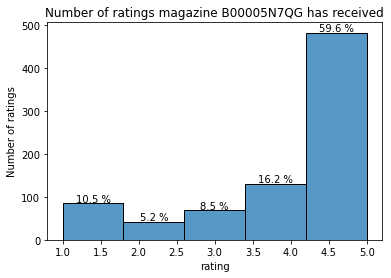

In [55]:
ax = sns.histplot(data = ratings.loc[ratings['productID'] == 'B00005N7QG'], x = 'rating', bins = 5)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:.1f} %'.format((height / len(ratings.loc[ratings['productID'] == 'B00005N7QG']) * 100)),ha="center")
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings magazine B00005N7QG has received')
plt.show();

Further analysis reveals that out of 604 users who rated magazine B00005N7QG, 59.6% of users  gave the magazine a rating of 5, followed by 16.2% of users rating the magazine 4.  Less than 25% of users rated the magazine below 4.  This suggests that user A17PGM166WWRS3 is some kind of outsider.